# Predict the impact of the incident raised by the customer.



In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

## The data
Let's start by reading in the incident_event_log.csv file into a pandas dataframe.

In [2]:
#Load the Data
data= pd.read_csv("incident_event_log.csv")

In [3]:
data.head(5)

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [4]:
data.shape

(141712, 36)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [6]:
data[data.duplicated()].shape

(0, 36)

In [7]:
data_cleaned= data.copy()

## replacing the '?' values with np.nan

In [8]:
data_cleaned.replace('?', np.nan, inplace=True)

In [9]:
data_cleaned.isna().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 139417
rfc           

In [10]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Changing the datatype for the opening and closing columns

In [11]:
columns_to_change_to_datetime = ['closed_at', 'opened_at' ]

for i in columns_to_change_to_datetime:
    data_cleaned[i] = data_cleaned[i].astype('datetime64[ns]')

In [12]:
data_cleaned.dtypes

number                             object
incident_state                     object
active                               bool
reassignment_count                  int64
reopen_count                        int64
sys_mod_count                       int64
made_sla                             bool
caller_id                          object
opened_by                          object
opened_at                  datetime64[ns]
sys_created_by                     object
sys_created_at                     object
sys_updated_by                     object
sys_updated_at                     object
contact_type                       object
location                           object
category                           object
subcategory                        object
u_symptom                          object
cmdb_ci                            object
impact                             object
urgency                            object
priority                           object
assignment_group                  

In [13]:
print('percentage of missing values'.upper())
data_cleaned.isna().sum()/data_cleaned.shape[0]*100

PERCENTAGE OF MISSING VALUES


number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

## dropping colmns with more than 90% missing values

In [14]:
drop = ['caused_by', 'rfc', 'vendor','cmdb_ci','problem_id']
data_cleaned.drop(drop,axis=1,inplace=True)

In [15]:
data_cleaned.shape

(141712, 31)

In [16]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,code 5,Resolved by 149,29/2/2016 11:29,2016-05-03 12:00:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,code 5,Resolved by 81,1/3/2016 09:52,2016-06-03 10:00:00


## Fillna

In [17]:
data_cleaned.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group           14213
assigned_to                27496
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                  714
resolved_by                  226
resolved_at                 3141
closed_at 

#### Creating new class for the missing columns

In [18]:
# creating a neww class for missing values  for caller id
data_cleaned['caller_id'].fillna(value='caller 4340',inplace=True)

# creating a neww class for missing values for opened by
data_cleaned['opened_by'].fillna(value = 'Opened by 4341', inplace=True)

# creating a neww class for missing values for sys created by
data_cleaned['sys_created_by'].fillna(value='Created by 4342', inplace=True)

# creating a neww class for missing values for location
data_cleaned['location'].fillna('Location 4343', inplace=True)

# creating a neww class for missing values for category
data_cleaned['category'].fillna('Category 4344',inplace=True)

# creating a neww class for missing values for subcategory
data_cleaned['subcategory'].fillna(value='Subcategory 4345',inplace=True)

# creating a neww class for missing values for symptoms
data_cleaned['u_symptom'].fillna(value='Symptom 4346', inplace=True)

# creating a neww class for missing values for assignment group
data_cleaned['assignment_group'].fillna(value='Group 4347',inplace=True)

# creating a neww class for missing values for resolver
data_cleaned['assigned_to'].fillna(value='Resolver 4348',inplace=True)


# replacing with mode
data_cleaned['closed_code'].fillna(data_cleaned['closed_code'].mode()[0],inplace=True)
data_cleaned['resolved_by'].fillna(data_cleaned['resolved_by'].mode()[0],inplace=True)

In [19]:
data_cleaned.isna().sum()

number                         0
incident_state                 0
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                      0
opened_by                      0
opened_at                      0
sys_created_by                 0
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                       0
category                       0
subcategory                    0
u_symptom                      0
impact                         0
urgency                        0
priority                       0
assignment_group               0
assigned_to                    0
knowledge                      0
u_priority_confirmation        0
notify                         0
closed_code                    0
resolved_by                    0
resolved_at                 3141
closed_at 

### Drop the columns whose date is missing

In [20]:
drop = ['sys_created_at', 'resolved_at']
data_cleaned.drop(drop,axis=1,inplace=True)

## Encoding the features

In [21]:
le = LabelEncoder()
le

LabelEncoder()

In [22]:
columns_to_be_label_encoded =['active',
                         'made_sla',
                         'contact_type',
                         'knowledge',
                         'u_priority_confirmation',
                         'notify',
                         'incident_state',
                         'caller_id',
                         'opened_by',
                         'sys_created_by',
                         'sys_updated_by',
                         'location',
                         'category',
                         'subcategory',
                         'u_symptom',
                         'assignment_group',
                         'assigned_to',
                         'closed_code',
                         'resolved_by',
                         'number',
                        'impact',
                        'urgency',
                        'priority']

In [23]:
for i in columns_to_be_label_encoded:
    data_cleaned[i] = le.fit_transform(data_cleaned[i])

In [24]:
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  int32         
 1   incident_state           141712 non-null  int32         
 2   active                   141712 non-null  int64         
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  int64         
 7   caller_id                141712 non-null  int32         
 8   opened_by                141712 non-null  int32         
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  int32         
 11  sys_updated_by           141712 non-null  int32         
 12  sys_updated_at  

In [25]:
###using ordinal Encoding for the ordinal Data 

In [26]:
#columns_to_be_ordinal_encoded = ['impact','urgency','priority']
#from sklearn.preprocessing import OrdinalEncoder
#oe = OrdinalEncoder()

#for i in columns_to_be_ordinal_encoded:
    #data_cleaned[i] = oe.fit_transform(data_cleaned[i].values.reshape(-1,1))

In [27]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141712 non-null  int32         
 1   incident_state           141712 non-null  int32         
 2   active                   141712 non-null  int64         
 3   reassignment_count       141712 non-null  int64         
 4   reopen_count             141712 non-null  int64         
 5   sys_mod_count            141712 non-null  int64         
 6   made_sla                 141712 non-null  int64         
 7   caller_id                141712 non-null  int32         
 8   opened_by                141712 non-null  int32         
 9   opened_at                141712 non-null  datetime64[ns]
 10  sys_created_by           141712 non-null  int32         
 11  sys_updated_by           141712 non-null  int32         
 12  sys_updated_at  

In [28]:
data_cleaned.tail()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,closed_at
141707,24916,6,0,1,0,4,1,168,9,2017-02-16 09:09:00,...,1,2,23,0,0,1,0,16,205,2017-02-16 09:53:00
141708,24917,1,1,0,0,0,1,168,9,2017-02-16 14:17:00,...,1,2,64,0,0,0,0,13,205,2017-02-16 16:38:00
141709,24917,1,1,1,0,1,1,168,9,2017-02-16 14:17:00,...,1,2,23,181,0,0,0,13,205,2017-02-16 16:38:00
141710,24917,8,1,1,0,2,1,168,9,2017-02-16 14:17:00,...,1,2,23,0,0,1,0,13,205,2017-02-16 16:38:00
141711,24917,6,0,1,0,3,1,168,9,2017-02-16 14:17:00,...,1,2,23,0,0,1,0,13,205,2017-02-16 16:38:00


## Data visualizations

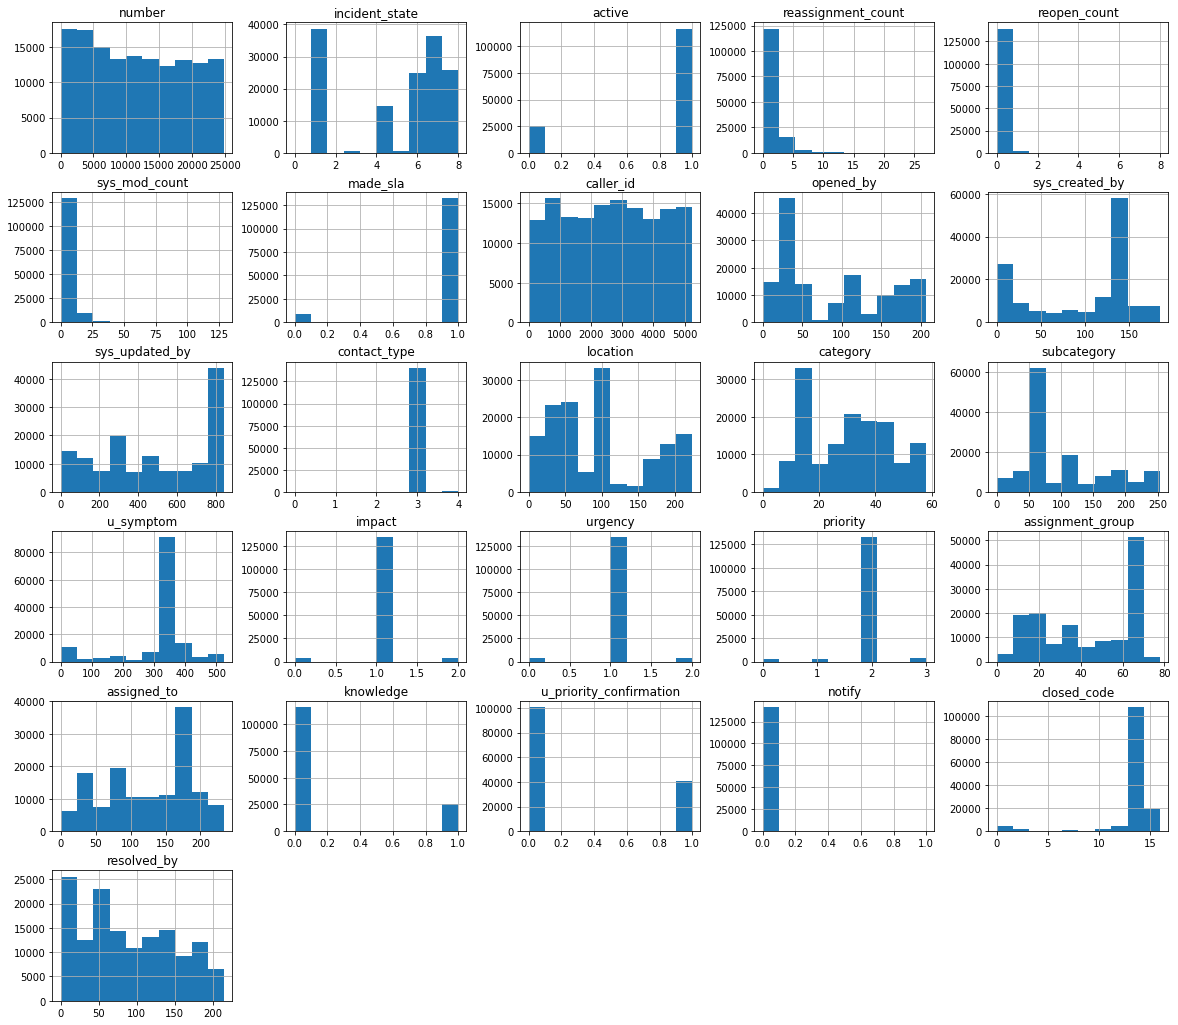

In [29]:
# histograms
data_cleaned.hist(figsize=(20, 18))
pyplot.show()

In [73]:
for column in data_cleaned.select_dtypes(include='object'):
    if data_cleaned[column].nunique() < 10:
        sns.countplot(y=column, data=data_cleaned)
        plt.show()

<AxesSubplot:>

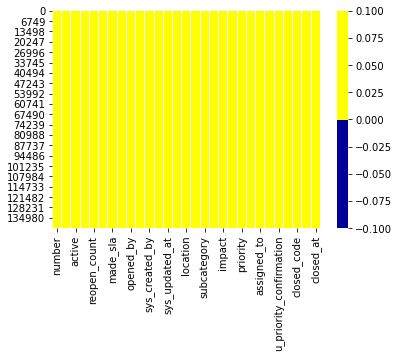

In [31]:
import seaborn as sns
cols = data_cleaned.columns
colours = ['#000099','#ffff00']      
sns.heatmap(data_cleaned[cols].isnull(),
           cmap=sns.color_palette(colours))

In [32]:
# Scatterplot Matrix
#from pandas.plotting import scatter_matrix

#scatter_matrix(data_cleaned)
#pyplot.show()

In [33]:
#Heat-Map
#import seaborn as sns
#cols = data_cleaned.columns
#colours = ['#ffff00','#000099']
#sns.heatmap(data_cleaned[cols].isnull(),
           #cmap=sns.color_palette(colours))

## different column has been created for day,date & year inorder to perform feature selection

In [34]:

data_cleaned["opened_at_day"]=pd.to_datetime(data_cleaned.opened_at).dt.day
data_cleaned["opened_at_month"]=pd.to_datetime(data_cleaned.opened_at).dt.month
data_cleaned["opened_at_year"]=pd.to_datetime(data_cleaned.opened_at).dt.year
data_cleaned["opened_at_hr"]=pd.to_datetime(data_cleaned.opened_at).dt.hour
data_cleaned["opened_at_minute"]=pd.to_datetime(data_cleaned.opened_at).dt.minute

data_cleaned["closed_at_day"]=pd.to_datetime(data_cleaned.closed_at).dt.day
data_cleaned["closed_at_month"]=pd.to_datetime(data_cleaned.closed_at).dt.month
data_cleaned["closed_at_year"]=pd.to_datetime(data_cleaned.closed_at).dt.year
data_cleaned["closed_at_hr"]=pd.to_datetime(data_cleaned.closed_at).dt.hour
data_cleaned["closed_at_minute"]=pd.to_datetime(data_cleaned.closed_at).dt.minute


In [35]:
data_cleaned.drop(['opened_at','closed_at'],axis=1,inplace=True)

In [36]:
data_cleaned.drop(['sys_updated_at'],axis=1,inplace=True)

In [37]:
data_cleaned.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,opened_at_day,opened_at_month,opened_at_year,opened_at_hr,opened_at_minute,closed_at_day,closed_at_month,closed_at_year,closed_at_hr,closed_at_minute
0,0,7,1,0,0,0,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
1,0,8,1,0,0,2,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
2,0,8,1,0,0,3,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
3,0,6,0,0,0,4,1,1462,200,152,...,29,2,2016,1,16,3,5,2016,12,0
4,1,7,1,0,0,0,1,1462,120,58,...,29,2,2016,4,40,3,6,2016,10,0


### spliting the data into x ad y variable

In [38]:
X=data_cleaned.drop("impact",axis=1)

In [39]:
Y = data_cleaned['impact']

In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: impact, dtype: int32

## Train and Test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

## Balancing of data
using smote to balance tha data

In [43]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train.astype('float'), y_train)

In [45]:
from collections import Counter
print("Before SMOTE :",Counter(y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({1: 94076, 2: 2714, 0: 2408})
After SMOTE : Counter({1: 94076, 2: 94076, 0: 94076})


# Feature Selection


### Feature Selection using ExtraTreesClassifier

In [46]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train_smote,y_train_smote)

ExtraTreesClassifier()

In [47]:
model.feature_importances_

array([1.05219610e-02, 9.53188252e-03, 8.75456919e-03, 3.74041168e-03,
       6.90273761e-04, 1.99550093e-03, 7.70245259e-03, 4.86464243e-03,
       2.09329739e-02, 1.66698669e-02, 5.02722617e-03, 2.77406775e-04,
       5.68799954e-03, 8.09456514e-03, 5.02032555e-03, 4.15532002e-03,
       2.90893243e-01, 4.98032013e-01, 6.15099437e-03, 5.31779446e-03,
       1.19438472e-02, 1.42303464e-02, 2.38395113e-06, 4.14939538e-03,
       8.31419265e-03, 4.77896295e-03, 5.56101936e-03, 5.07436085e-04,
       1.09507033e-02, 3.61885573e-03, 5.73790383e-03, 4.54774752e-03,
       5.52218178e-04, 5.01428733e-03, 6.02927705e-03])

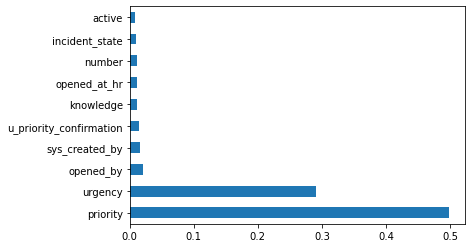

In [48]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

### Feature Selection using Mutual information

In [49]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train_smote, y_train_smote)
mutual_info

array([6.97298132e-01, 2.54342342e-01, 8.94131984e-02, 1.64570765e-01,
       3.30128579e-03, 4.83350891e-01, 7.09186860e-02, 6.05181420e-01,
       4.86503465e-01, 3.37054276e-01, 3.80200488e-01, 2.50938270e-02,
       1.93095663e-01, 2.56519607e-01, 2.71546638e-01, 2.29474739e-01,
       7.63277098e-01, 1.09227276e+00, 3.31340615e-01, 3.76060966e-01,
       2.73317552e-02, 1.01610176e-01, 3.22253389e-04, 9.27566038e-02,
       3.72393695e-01, 8.35558797e-02, 4.70202125e-02, 1.68441693e-02,
       1.87113827e-01, 1.76507143e-01, 1.08435288e-01, 8.78796743e-02,
       1.60053024e-02, 1.51885416e-01, 7.98476593e-02])

In [50]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

priority                   1.092273
urgency                    0.763277
number                     0.697298
caller_id                  0.605181
opened_by                  0.486503
sys_mod_count              0.483351
sys_updated_by             0.380200
assigned_to                0.376061
resolved_by                0.372394
sys_created_by             0.337054
assignment_group           0.331341
subcategory                0.271547
category                   0.256520
incident_state             0.254342
u_symptom                  0.229475
location                   0.193096
opened_at_hr               0.187114
opened_at_minute           0.176507
reassignment_count         0.164571
closed_at_hr               0.151885
closed_at_day              0.108435
u_priority_confirmation    0.101610
closed_code                0.092757
active                     0.089413
closed_at_month            0.087880
opened_at_day              0.083556
closed_at_minute           0.079848
made_sla                   0

<AxesSubplot:>

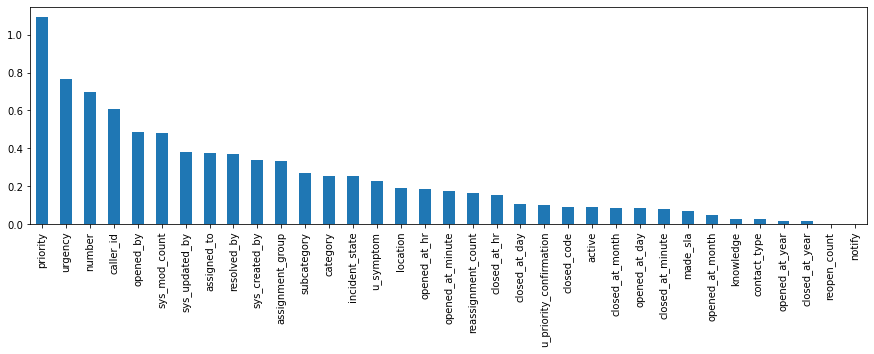

In [51]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 4))

### Feature Importance using Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier()

In [53]:
feature = pd.Series(model.feature_importances_)
feature.index = X_train.columns
feature.sort_values(ascending=False)

priority                   9.840467e-01
urgency                    1.472182e-02
subcategory                3.041398e-04
category                   2.620410e-04
opened_by                  1.800133e-04
caller_id                  8.425423e-05
reassignment_count         7.935831e-05
location                   7.268638e-05
closed_at_hr               5.728459e-05
sys_mod_count              5.029110e-05
knowledge                  3.765952e-05
closed_at_minute           3.156591e-05
assigned_to                2.118363e-05
sys_created_by             1.684095e-05
opened_at_day              1.014654e-05
closed_at_day              9.448625e-06
number                     7.967816e-06
sys_updated_by             5.314852e-06
incident_state             4.754489e-07
closed_code                3.156058e-07
opened_at_hr               3.115015e-07
active                     2.247796e-07
closed_at_year             0.000000e+00
reopen_count               0.000000e+00
closed_at_month            0.000000e+00


<AxesSubplot:>

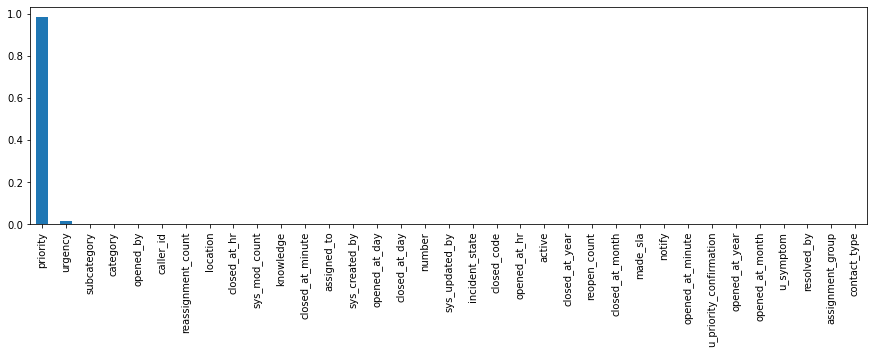

In [54]:
feature.sort_values(ascending=False).plot.bar(figsize=(15, 4))

### Feature Selection using Chi Square

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
ordered_rank_feature=SelectKBest(score_func=chi2,k=16)
ordered_feature=ordered_rank_feature.fit(X_train_smote,y_train_smote)
ordered_feature

SelectKBest(k=16, score_func=<function chi2 at 0x00000211B5E18700>)

In [57]:
df_scores=pd.DataFrame(ordered_feature.scores_,columns=['scores'])
df_columns=pd.DataFrame(X_train.columns)
features_rank=pd.concat([df_scores,df_columns],axis=1)
features_rank.nlargest(10,'scores')

#These are top 10 features useful for predicting impact

,scores,0
0,5.489010e+07,number
8,1.489334e+06,opened_by
9,2.501975e+05,sys_created_by
10,2.350332e+05,sys_updated_by
17,1.893693e+05,priority
16,1.033814e+05,urgency
24,8.445939e+04,resolved_by
34,7.385006e+04,closed_at_minute
19,6.908591e+04,assigned_to
7,3.684925e+04,caller_id


# Using the important features which we have obtained after feature selection
number,opened_by,sys_created_by,sys_created_by,priority,urgency,resolved_by,closed_at_minute,assigned_to,caller_id



In [58]:
#X_train_smote_new= X_train_smote[['number','opened_by','sys_created_by','sys_created_by','priority','urgency','resolved_by','closed_at_minute','assigned_to','caller_id']]
#X_test_new= X_test[['number','opened_by','sys_created_by','sys_created_by','priority','urgency','resolved_by','closed_at_minute','assigned_to','caller_id']]

In [75]:
X_train_smote_new= X_train_smote[['priority','urgency','number','caller_id','opened_by','sys_mod_count','sys_updated_by','assigned_to','resolved_by','sys_created_by']]
X_test_new= X_test[['priority','urgency','number','caller_id','opened_by','sys_mod_count','sys_updated_by','assigned_to','resolved_by','sys_created_by']]

In [ ]:
priority                   1.092273
urgency                    0.763277
number                     0.697298
caller_id                  0.605181
opened_by                  0.486503
sys_mod_count              0.483351
sys_updated_by             0.380200
assigned_to                0.376061
resolved_by                0.372394
sys_created_by  

### RandomForestClassifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train_smote_new,y_train_smote)

RandomForestClassifier(max_depth=27)

In [80]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test_new)

In [81]:
# Finding accuracy, precision, recall and confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9999294350096439
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00     40259
           2       1.00      1.00      1.00      1172

    accuracy                           1.00     42514
   macro avg       1.00      1.00      1.00     42514
weighted avg       1.00      1.00      1.00     42514



In [62]:
confusion_matrix(y_test,y_predict_rf)

array([[ 1083,     0,     0],
       [    0, 40257,     2],
       [    0,     0,  1172]], dtype=int64)

In [63]:
accuracy_rf = (995+39653+1201)/(42513)*100

In [64]:
accuracy_rf

98.438124808882

### DecisionTreeClassifier

In [76]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train_smote_new,y_train_smote)


DecisionTreeClassifier()

In [77]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test_new)

In [78]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9999529566730959
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00     40259
           2       1.00      1.00      1.00      1172

    accuracy                           1.00     42514
   macro avg       1.00      1.00      1.00     42514
weighted avg       1.00      1.00      1.00     42514



In [83]:
confusion_matrix(y_test,y_predict_dtree )

array([[ 1083,     0,     0],
       [    0, 40259,     0],
       [    0,     2,  1170]], dtype=int64)

In [69]:
accuracy_dtree = (1013+39617+1192)/(42513)*100

In [70]:
accuracy_dtree

98.374614823701

### KNN Classification

In [82]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X_train_smote_new, y_train_smote, cv=kfold)

print(results.mean())

0.9112850291582081


### Gaussian Naive Bayes Classification

In [74]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X_train_smote_new, y_train_smote, cv=kfold)
print(results.mean())

0.9934166784445132
